In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import seaborn as sns
import scipy.stats
import anndata
import os

import scipy as scipy
import scipy as sp
import pickle as pkl
import matplotlib.pyplot as plt
import re
from collections import defaultdict
from statsmodels.nonparametric.smoothers_lowess import lowess
from numpy import asarray as ar
from collections import Counter
import networkx as nx
import igraph
import glob
import scirpy as ir
import sys

import bbknn

os.getcwd()

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

sc.settings.set_figure_params(dpi=100, color_map='Blues')
sc.logging.print_version_and_date()
%load_ext autoreload
%autoreload 2

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-le2cxpa3 because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Running Scanpy 1.6.0, on 2022-03-07 13:06.


In [2]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

def subtraction(lst1, lst2): 
    lst3 = [value for value in lst1 if not value in lst2] 
    return lst3

### TCR data

In [3]:
adata = sc.read('/mnt/Science_revision/write/TICA_TILC.h5ad')

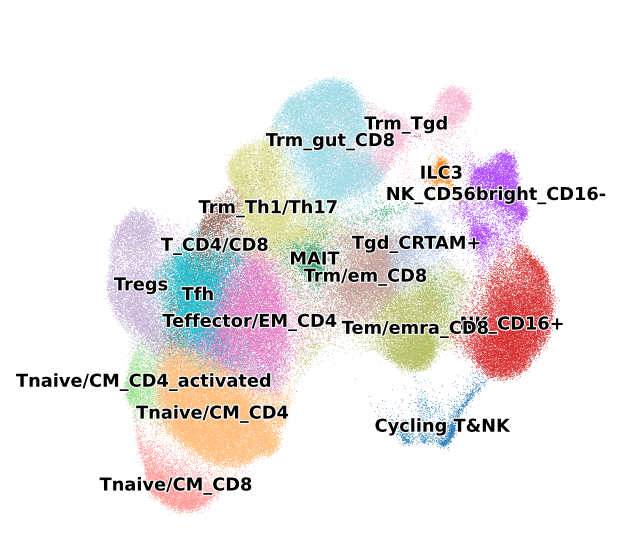

In [4]:
sc.set_figure_params(dpi_save=600)
sc.pl.umap(adata, color='manual_annot_v6', frameon=False, title=' ', legend_loc='on data', legend_fontoutline=1, legend_fontsize=8)

#### 5prime dataset (no multiplexing)

In [5]:
meta_GEX_VDJ = pd.read_csv('/mnt/Science_revision/meta_GEX_VDJ.csv', index_col='Sanger_Sample_ID')

In [6]:
meta_GEX_VDJ.head(1)

CBTM_ID   ID   Identity Sanger Sample ID sex
Sanger_Sample_ID                                             
Pan_T7935501        390C  A29  A29-ILE-1     Pan_T7935490   F

In [7]:
samples = meta_GEX_VDJ.index

In [8]:
samples

Index(['Pan_T7935501', 'Pan_T7935503', 'Pan_T7935504', 'Pan_T7935505',
       'Pan_T7935506', 'Pan_T7935507', 'Pan_T7935502', 'Pan_T7918887',
       'Pan_T7918888', 'Pan_T7918889', 'Pan_T7918890', 'Pan_T7918891',
       'Pan_T7918892', 'Pan_T7918893', 'Pan_T7918894', 'Pan_T7918895',
       'Pan_T7918896', 'Pan_T7918900', 'Pan_T7918899', 'Pan_T7918898',
       'Pan_T7980371', 'Pan_T7980372', 'Pan_T7980373', 'Pan_T7980374',
       'Pan_T7980377', 'Pan_T7980378', 'Pan_T7980379', 'Pan_T7980380',
       'Pan_T7980381', 'Pan_T7980382', 'Pan_T7980383', 'Pan_T7991613',
       'Pan_T7991614', 'Pan_T7991615', 'Pan_T7991616', 'Pan_T7991617',
       'Pan_T7991618', 'Pan_T7991619', 'Pan_T7991620', 'Pan_T7991621',
       'Pan_T7991622', 'Pan_T7991623', 'Pan_T7991624', 'Pan_T8010345',
       'Pan_T8010346', 'Pan_T8010347', 'Pan_T8010348', 'Pan_T8010349',
       'Pan_T8010350', 'Pan_T8010351', 'Pan_T8010352', 'Pan_T8010353',
       'Pan_T8010356', 'Pan_T8010357', 'Pan_T7935498', 'Pan_T7935499',
      

In [9]:
samples = ['Pan_T7935501', 'Pan_T7935503', 'Pan_T7935504', 'Pan_T7935505',
       'Pan_T7935506', 'Pan_T7935507', 'Pan_T7935502', 'Pan_T7918887',
       'Pan_T7918888', 'Pan_T7918889', 'Pan_T7918890', 'Pan_T7918891',
       'Pan_T7918892', 'Pan_T7918893', 'Pan_T7918894', 'Pan_T7918895',
       'Pan_T7918896', 'Pan_T7918900', 'Pan_T7918899', 'Pan_T7918898',
       'Pan_T7980371', 'Pan_T7980372', 'Pan_T7980373', 'Pan_T7980374',
       'Pan_T7980377', 'Pan_T7980378', 'Pan_T7980379', 
       'Pan_T7980381', 'Pan_T7980383', 'Pan_T7991613',
       'Pan_T7991614', 'Pan_T7991615', 'Pan_T7991616', 'Pan_T7991617',
       'Pan_T7991618', 'Pan_T7991619', 'Pan_T7991620', 
       'Pan_T7991622', 'Pan_T7991623', 'Pan_T7991624', 'Pan_T8010345',
        'Pan_T8010347', 'Pan_T8010348', 
       'Pan_T8010350', 'Pan_T8010351', 'Pan_T8010352', 'Pan_T8010353',
       'Pan_T8010356', 'Pan_T8010357', 'Pan_T7935498', 'Pan_T7935499',
       'Pan_T7935500']

In [10]:
holder = []

for sample_vdj in samples:
    
    holder.append(ir.io.read_10x_vdj('/mnt/Science_revision/rawdata/TCRab/PIP/'+sample_vdj+'/filtered_contig_annotations.csv'))
 
    sample_gex = meta_GEX_VDJ.loc[sample_vdj, 'Sanger Sample ID']
    holder[-1].obs_names = [sample_gex+'_'+i.split('-')[0] for i in holder[-1].obs_names]
    holder[-1].obs['sample_T_vdj'] = sample_vdj       

... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as cat

In [11]:
adata_tcr1 = pd.concat([i.obs for i in holder])

In [12]:
adata_tcr1.head(1)

multi_chain IR_VJ_1_locus IR_VJ_2_locus  \
Pan_T7935490_AAACCTGCAAATTGCC        False           TRA           NaN   

                              IR_VDJ_1_locus IR_VDJ_2_locus   IR_VJ_1_cdr3  \
Pan_T7935490_AAACCTGCAAATTGCC            TRB            NaN  CAEKATSNARLMF   

                              IR_VJ_2_cdr3   IR_VDJ_1_cdr3 IR_VDJ_2_cdr3  \
Pan_T7935490_AAACCTGCAAATTGCC          NaN  CASSSFGATDTQYF           NaN   

                                                       IR_VJ_1_cdr3_nt  ...  \
Pan_T7935490_AAACCTGCAAATTGCC  TGTGCAGAGAAAGCTACGAGCAATGCCAGACTCATGTTT  ...   

                              IR_VJ_1_c_gene IR_VJ_2_c_gene IR_VDJ_1_c_gene  \
Pan_T7935490_AAACCTGCAAATTGCC           TRAC            NaN           TRBC2   

                               IR_VDJ_2_c_gene IR_VJ_1_junction_ins  \
Pan_T7935490_AAACCTGCAAATTGCC              NaN                 None   

                               IR_VJ_2_junction_ins IR_VDJ_1_junction_ins  \
Pan_T7935490_AAACCTGCAAATTGCC                  None                  None   

                               IR_VDJ_2_junction_ins has_ir  sample_T_vdj  
Pan_T7935490_AAACCTGCAAATTGCC                   None   True  Pan_T7935501  

[1 rows x 43 columns]

#### 5prime dataset (multiplexing)

In [13]:
meta_GEX_VDJ_CZI = pd.read_csv('/mnt/Science_revision/CZI_UK_libraries_unique_VDJ.csv', index_col='TCRab')

In [14]:
meta_GEX_VDJ_CZI.head(1)

GEX lib        ADT lib             BCR
TCRab                                                       
CZI-IA10586214  CZI-IA9924320  CZI-IA9924368  CZI-IA10586223

In [15]:
meta_GEX_VDJ_CZI['combined_ID'] = meta_GEX_VDJ_CZI['GEX lib'].astype(str)+'+'+meta_GEX_VDJ_CZI['ADT lib'].astype(str)

In [16]:
meta_GEX_VDJ_CZI.head(1)

GEX lib        ADT lib             BCR  \
TCRab                                                          
CZI-IA10586214  CZI-IA9924320  CZI-IA9924368  CZI-IA10586223   

                                combined_ID  
TCRab                                        
CZI-IA10586214  CZI-IA9924320+CZI-IA9924368

In [17]:
samples = meta_GEX_VDJ_CZI.index

In [18]:
samples

Index(['CZI-IA10586214', 'CZI-IA10586215', 'CZI-IA10586216', 'CZI-IA10586217',
       'CZI-IA10586218', 'CZI-IA9924342', 'CZI-IA9924343', 'CZI-IA9924341',
       'CZI-IA9924344', 'CZI-IA10034952', 'CZI-IA10034953', 'CZI-IA10034954',
       'CZI-IA10034955', 'CZI-IA10034956', 'CZI-IA10034957', 'CZI-IA10034958',
       'CZI-IA10034959', 'CZI-IA10034960', 'CZI-IA10244332', 'CZI-IA10244331',
       'CZI-IA10244335', 'CZI-IA10244336', 'CZI-IA10244334', 'CZI-IA10244333',
       'CZI-IA10466281', 'CZI-IA10466282', 'CZI-IA10466283', 'CZI-IA10466284',
       'CZI-IA10466285', 'CZI-IA10466286', 'CZI-IA10466291', 'CZI-IA10466287',
       'CZI-IA10466288', 'CZI-IA10466289', 'CZI-IA10466290', 'CZI-IA10471909',
       'CZI-IA10471910', 'CZI-IA10471911', 'CZI-IA10471912', 'CZI-IA10471913'],
      dtype='object', name='TCRab')

In [19]:
samples = ['CZI-IA10586214', 'CZI-IA10586215', 'CZI-IA10586216', 'CZI-IA10586217',
       'CZI-IA10586218',  'CZI-IA10034952', 'CZI-IA10034953', 'CZI-IA10034954',
       'CZI-IA10034955', 'CZI-IA10034956', 'CZI-IA10034957', 'CZI-IA10034958',
       'CZI-IA10034959', 'CZI-IA10034960', 'CZI-IA10244332', 'CZI-IA10244331',
        'CZI-IA10244336', 'CZI-IA10244334', 'CZI-IA10244333',
       'CZI-IA10466281', 'CZI-IA10466282', 'CZI-IA10466283', 'CZI-IA10466284',
       'CZI-IA10466285', 'CZI-IA10466286', 'CZI-IA10466291', 'CZI-IA10466287',
       'CZI-IA10466288', 'CZI-IA10466289', 'CZI-IA10466290', 'CZI-IA10471909',
       'CZI-IA10471910', 'CZI-IA10471911', 'CZI-IA10471912', 'CZI-IA10471913']

In [20]:
holder = []

for sample_vdj in samples:
    print(sample_vdj)
    holder.append(ir.io.read_10x_vdj('/mnt/Science_revision/rawdata/TCRab/CZI/'+sample_vdj+'/filtered_contig_annotations.csv'))
    
    sample_gex = meta_GEX_VDJ_CZI.loc[sample_vdj, 'combined_ID']
    holder[-1].obs_names = [sample_gex+'_'+i.split('-')[0] for i in holder[-1].obs_names]
    holder[-1].obs['sample_T_vdj'] = sample_vdj    

CZI-IA10586214


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10586215


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10586216


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10586217


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical


CZI-IA10586218
CZI-IA10034952


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10034953


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10034954


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10034955


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical


CZI-IA10034956


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10034957


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10034958


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10034959


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10034960


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10244332


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10244331


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10244336


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical


CZI-IA10244334


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10244333


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10466281


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10466282


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10466283


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10466284


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10466285
CZI-IA10466286


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical


CZI-IA10466291
CZI-IA10466287


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10466288


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10466289


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10466290


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10471909


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10471910


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10471911


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10471912


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


CZI-IA10471913


... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical


In [21]:
adata_tcr2 = pd.concat([i.obs for i in holder])

In [22]:
adata_tcr2.head(1)

multi_chain IR_VJ_1_locus  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG        False           NaN   

                                             IR_VJ_2_locus IR_VDJ_1_locus  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG           NaN            TRB   

                                             IR_VDJ_2_locus IR_VJ_1_cdr3  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG            NaN          NaN   

                                             IR_VJ_2_cdr3    IR_VDJ_1_cdr3  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG          NaN  CASSRRRQGNSPLHF   

                                             IR_VDJ_2_cdr3 IR_VJ_1_cdr3_nt  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG           NaN             NaN   

                                              ... IR_VJ_1_c_gene  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG  ...            NaN   

                                             IR_VJ_2_c_gene IR_VDJ_1_c_gene  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG            NaN           TRBC1   

                                              IR_VDJ_2_c_gene  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG              NaN   

                                             IR_VJ_1_junction_ins  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG                 None   

                                              IR_VJ_2_junction_ins  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG                  None   

                                             IR_VDJ_1_junction_ins  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG                  None   

                                              IR_VDJ_2_junction_ins has_ir  \
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG                   None   True   

                                                sample_T_vdj  
CZI-IA9924320+CZI-IA9924368_AAACCTGAGTGCGATG  CZI-IA10586214  

[1 rows x 43 columns]

In [23]:
holder = [adata_tcr1, adata_tcr2]

In [24]:
adata_tcr = pd.concat([i for i in holder])

In [25]:
for col in adata_tcr.columns:
    adata.obs[col] = adata_tcr[col]

In [26]:
adata.obs.head(1)

sample Source ID sex patient no  \
Pan_T7935490_AAACCTGCAAATTGCC  Pan_T7935490      390C   F        A29   

                              organ code       sample ID  fraction_mito  \
Pan_T7935490_AAACCTGCAAATTGCC        ILE  A29-ILE-0-SC-1       0.049985   

                               n_genes    n_counts  log_counts  ...  \
Pan_T7935490_AAACCTGCAAATTGCC     2191  2823.19873    8.785998  ...   

                              IR_VJ_1_c_gene IR_VJ_2_c_gene IR_VDJ_1_c_gene  \
Pan_T7935490_AAACCTGCAAATTGCC           TRAC            NaN           TRBC2   

                              IR_VDJ_2_c_gene  IR_VJ_1_junction_ins  \
Pan_T7935490_AAACCTGCAAATTGCC             NaN                  None   

                               IR_VJ_2_junction_ins  IR_VDJ_1_junction_ins  \
Pan_T7935490_AAACCTGCAAATTGCC                  None                   None   

                               IR_VDJ_2_junction_ins  has_ir  sample_T_vdj  
Pan_T7935490_AAACCTGCAAATTGCC                   None    True  Pan_T7935501  

[1 rows x 125 columns]

In [27]:
adata.obs.columns

Index(['sample', 'Source ID', 'sex', 'patient no', 'organ code', 'sample ID',
       'fraction_mito', 'n_genes', 'n_counts', 'log_counts',
       ...
       'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene',
       'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins',
       'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir',
       'sample_T_vdj'],
      dtype='object', length=125)

In [28]:
vdj_list = ['Pan_T7935503',
 'Pan_T7935504',
 'Pan_T7935505',
 'Pan_T7935506',
 'Pan_T7935507',
 'Pan_T7935502',
 'Pan_T7918887',
 'Pan_T7918888',
 'Pan_T7918889',
 'Pan_T7918890',
 'Pan_T7918891',
 'Pan_T7918892',
 'Pan_T7918893',
 'Pan_T7918894',
 'Pan_T7918895',
 'Pan_T7918896',
 'Pan_T7918899',
 'Pan_T7980371',
 'Pan_T7980372',
 'Pan_T7980373',
 'Pan_T7980374',
 'Pan_T7980377',
 'Pan_T7980378',
 'Pan_T7980379',
 'Pan_T7980381',
 'Pan_T7980383',
 'Pan_T7991613',
 'Pan_T7991614',
 'Pan_T7991615',
 'Pan_T7991616',
 'Pan_T7991617',
 'Pan_T7991618',
 'Pan_T7991619',
 'Pan_T7991620',
 'Pan_T7991622',
 'Pan_T7991623',
 'Pan_T8010345',
 'Pan_T8010347',
 'Pan_T8010348',
 'Pan_T8010351',
 'Pan_T8010352',
 'Pan_T8010353',
 'Pan_T8010356',
 'Pan_T8010357',
 'Pan_T7935498',
 'Pan_T7935499',
 'Pan_T7935500',
 'CZI-IA10586214',
 'CZI-IA10586215',
 'CZI-IA10244332',
 'CZI-IA10244331',
 'CZI-IA10466281',
 'CZI-IA10466282',
 'CZI-IA10466283',
 'CZI-IA10466284',
 'CZI-IA10466285',
 'CZI-IA10466286',
 'CZI-IA10471909',
 'CZI-IA10471910',
 'CZI-IA10471911',
 'CZI-IA10471912',
 'CZI-IA10471913']

In [29]:
ir.tl.chain_pairing(adata)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: chain_pairing is a deprecated function and will be removed in a future version of scirpy. Use `tl.chain_qc` instead.
  """Entry point for launching an IPython kernel.


In [30]:
prob_cols = ['multi_chain',
 'IR_VJ_1_locus',
 'IR_VJ_2_locus',
 'IR_VDJ_1_locus',
 'IR_VDJ_2_locus',
 'IR_VJ_1_cdr3',
 'IR_VJ_2_cdr3',
 'IR_VDJ_1_cdr3',
 'IR_VDJ_2_cdr3',
 'IR_VJ_1_cdr3_nt',
 'IR_VJ_2_cdr3_nt',
 'IR_VDJ_1_cdr3_nt',
 'IR_VDJ_2_cdr3_nt',
 'IR_VJ_1_expr',
 'IR_VJ_2_expr',
 'IR_VDJ_1_expr',
 'IR_VDJ_2_expr',
 'IR_VJ_1_expr_raw',
 'IR_VJ_2_expr_raw',
 'IR_VDJ_1_expr_raw',
 'IR_VDJ_2_expr_raw',
 'IR_VJ_1_v_gene',
 'IR_VJ_2_v_gene',
 'IR_VDJ_1_v_gene',
 'IR_VDJ_2_v_gene',
 'IR_VJ_1_d_gene',
 'IR_VJ_2_d_gene',
 'IR_VDJ_1_d_gene',
 'IR_VDJ_2_d_gene',
 'IR_VJ_1_j_gene',
 'IR_VJ_2_j_gene',
 'IR_VDJ_1_j_gene',
 'IR_VDJ_2_j_gene',
 'IR_VJ_1_c_gene',
 'IR_VJ_2_c_gene',
 'IR_VDJ_1_c_gene',
 'IR_VDJ_2_c_gene',
 'IR_VJ_1_junction_ins',
 'IR_VJ_2_junction_ins',
 'IR_VDJ_1_junction_ins',
 'IR_VDJ_2_junction_ins',
 'has_ir',
 'sample_T_vdj',
 'receptor_type',
 'receptor_subtype',
 'chain_pairing']

In [31]:
for col in prob_cols:
    adata.obs[col] = [str(i) for i in adata.obs[col]]

In [32]:
adata.write('/mnt/Science_revision/write/TICA_TILC_TCR.h5ad')

... storing 'multi_chain' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr' as categorical
... storing 'IR_VJ_2_expr' as categorical
... storing 'IR_VDJ_1_expr' as categorical
... storing 'IR_VDJ_2_expr' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as c

In [33]:
adata.obs.columns

Index(['sample', 'Source ID', 'sex', 'patient no', 'organ code', 'sample ID',
       'fraction_mito', 'n_genes', 'n_counts', 'log_counts',
       ...
       'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins',
       'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir',
       'sample_T_vdj', 'receptor_type', 'receptor_subtype', 'chain_pairing'],
      dtype='object', length=128)

## Define clonotypes and clonotype clusters

## select only single pair cells

In [34]:
adata.obs.chain_pairing.unique()

['single pair', 'extra VJ', 'no IR', 'extra VDJ', 'orphan VDJ', 'two full chains', 'orphan VJ']
Categories (7, object): ['single pair', 'extra VJ', 'no IR', 'extra VDJ', 'orphan VDJ', 'two full chains', 'orphan VJ']

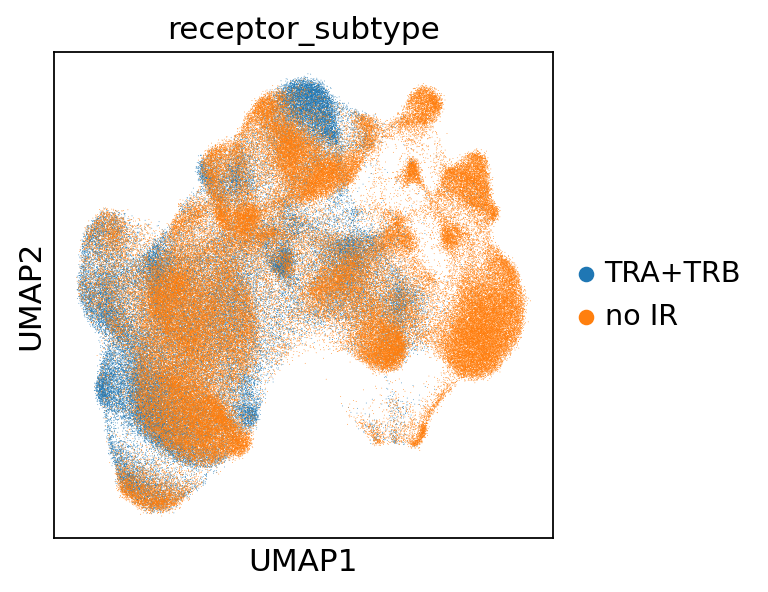

In [35]:
sc.pl.umap(adata, color='receptor_subtype')

In [36]:
## select cells with a single pair of TCR chains
adata = adata[adata.obs["chain_pairing"] == "single pair"]

## filter T cell subsets

In [37]:
list(adata.obs['manual_annot_v6'].unique())

['Trm_Th1/Th17',
 'Trm_gut_CD8',
 'T_CD4/CD8',
 'Trm/em_CD8',
 'Trm_Tgd',
 'Tregs',
 'Tem/emra_CD8',
 'Tfh',
 'Cycling T&NK',
 'Tnaive/CM_CD4',
 'Tgd_CRTAM+',
 'Teffector/EM_CD4',
 'MAIT',
 'Tnaive/CM_CD8',
 'NK_CD16+',
 'Tnaive/CM_CD4_activated',
 'NK_CD56bright_CD16-',
 'ILC3']

In [38]:
adata = adata[adata.obs['manual_annot_v6'].isin(['Trm_Th1/Th17',
 'Trm_gut_CD8',
 'T_CD4/CD8',
 'Trm/em_CD8',
 
 'Tregs',
 'Tem/emra_CD8',
 'Tfh',
 'Cycling T&NK',
 'Tnaive/CM_CD4',
 
 'Teffector/EM_CD4',
 
 'Tnaive/CM_CD8',

 'Tnaive/CM_CD4_activated'])]

In [39]:
adata.write('/mnt/Science_revision/write/TICA_TILC_TCR_selected.h5ad')

In [40]:
adata.obs["chain_pairing"].unique()

['single pair']
Categories (1, object): ['single pair']

In [41]:
adata.obs["manual_annot_v6"].unique()

['Trm_Th1/Th17', 'Trm_gut_CD8', 'T_CD4/CD8', 'Trm/em_CD8', 'Tregs', ..., 'Cycling T&NK', 'Tnaive/CM_CD4', 'Teffector/EM_CD4', 'Tnaive/CM_CD8', 'Tnaive/CM_CD4_activated']
Length: 12
Categories (12, object): ['Trm_Th1/Th17', 'Trm_gut_CD8', 'T_CD4/CD8', 'Trm/em_CD8', ..., 'Tnaive/CM_CD4', 'Teffector/EM_CD4', 'Tnaive/CM_CD8', 'Tnaive/CM_CD4_activated']

In [42]:
adata.obs['receptor_subtype'].unique()

['TRA+TRB']
Categories (1, object): ['TRA+TRB']

In [43]:
ir.pp.ir_neighbors(adata,receptor_arms="all", dual_ir="primary_only", inplace=True, sequence='nt')

Initializing IrNeighbors object...
Finished initalizing IrNeighbors object.  (0:00:03)
Computing VJ pairwise distances...
Finished computing VJ pairwise distances. (0:00:00)
Computing VDJ pairwise distances...
Finished computing VDJ pairwise distances. (0:00:00)
Started comstructing VJ coord-dictionary...


100%|██████████| 32901/32901 [00:08<00:00, 3928.58it/s] 

Finished constructing VJ coord-dictionary (0:00:08)
Started comstructing VDJ coord-dictionary...



100%|██████████| 33660/33660 [00:06<00:00, 5524.51it/s]

Finished constructing VDJ coord-dictionary (0:00:06)
Constructing cell x cell distance matrix...



100%|██████████| 2092871/2092871 [00:27<00:00, 76868.83it/s]

Finished constructing cell x cell distance matrix.  (0:00:27)



Trying to set attribute `._uns` of view, copying.


In [44]:
ir.tl.define_clonotypes(adata)

In [45]:
ir.tl.clonotype_network(adata, min_size=2)

... storing 'clonotype' as categorical


array([<AxesSubplot:title={'center':'clonotype'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

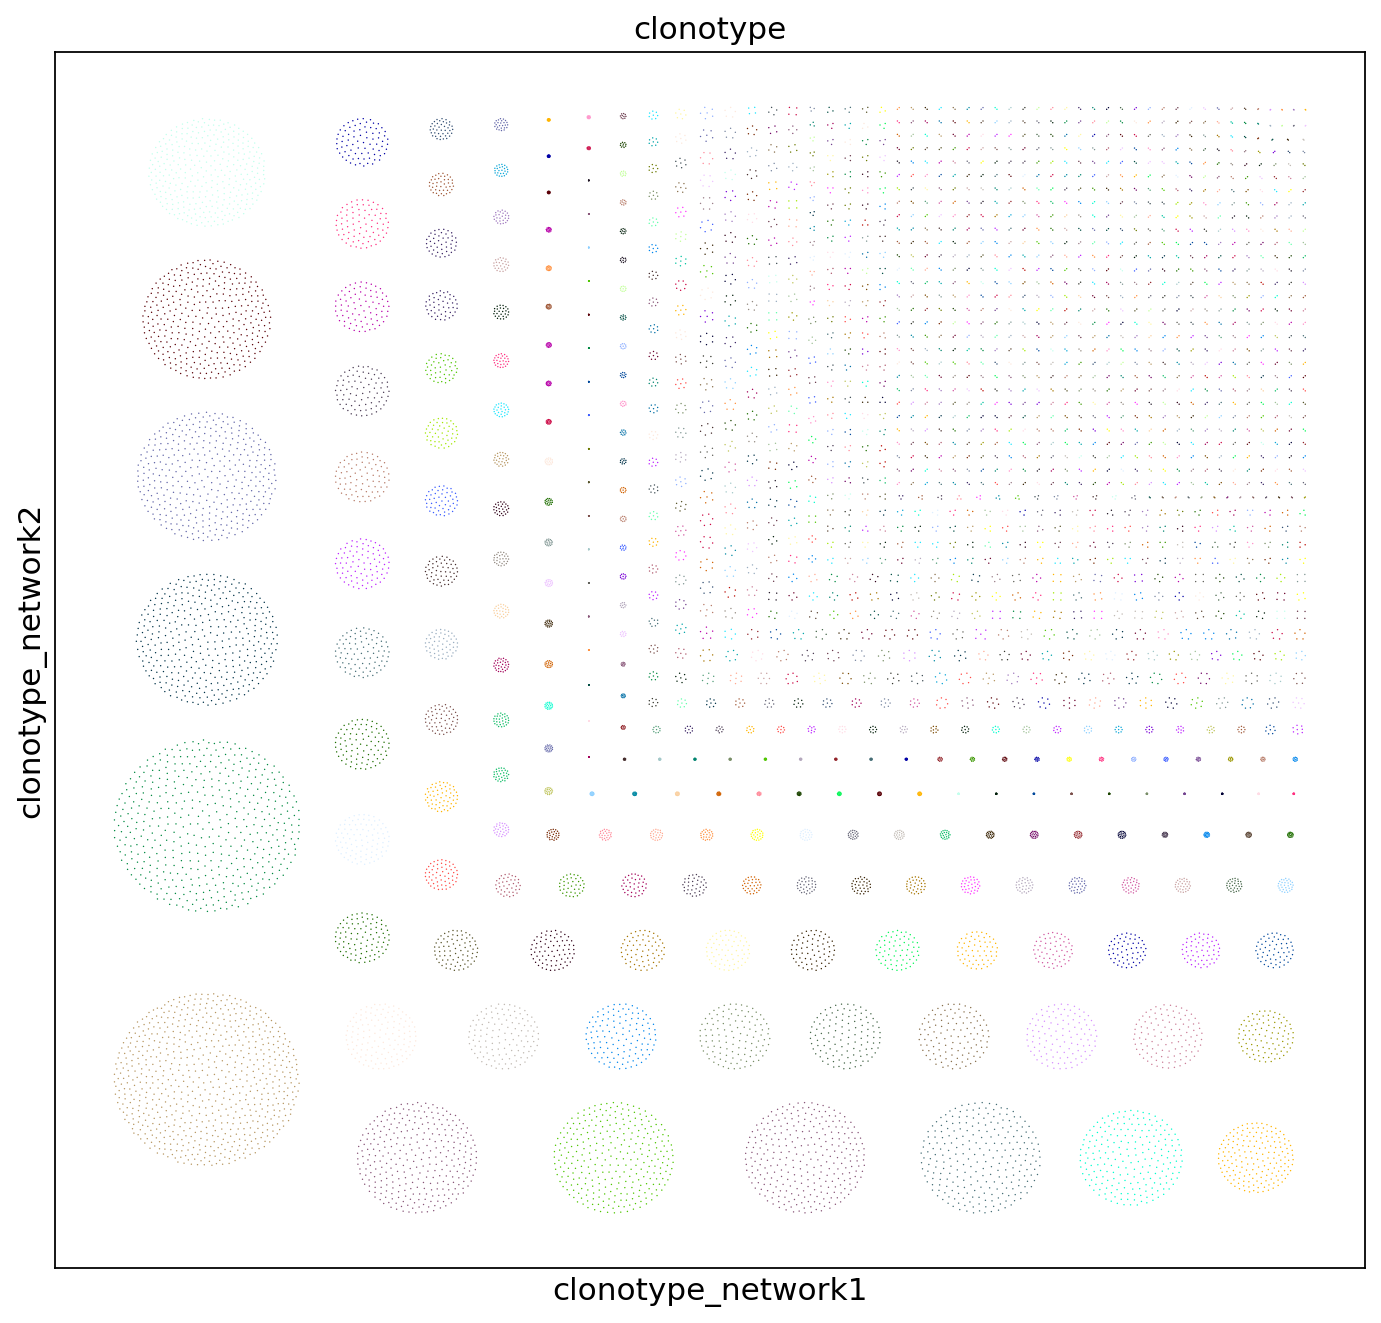

In [46]:
ir.pl.clonotype_network(adata, color="clonotype", legend_loc="none")

array([<AxesSubplot:title={'center':'donor_id'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

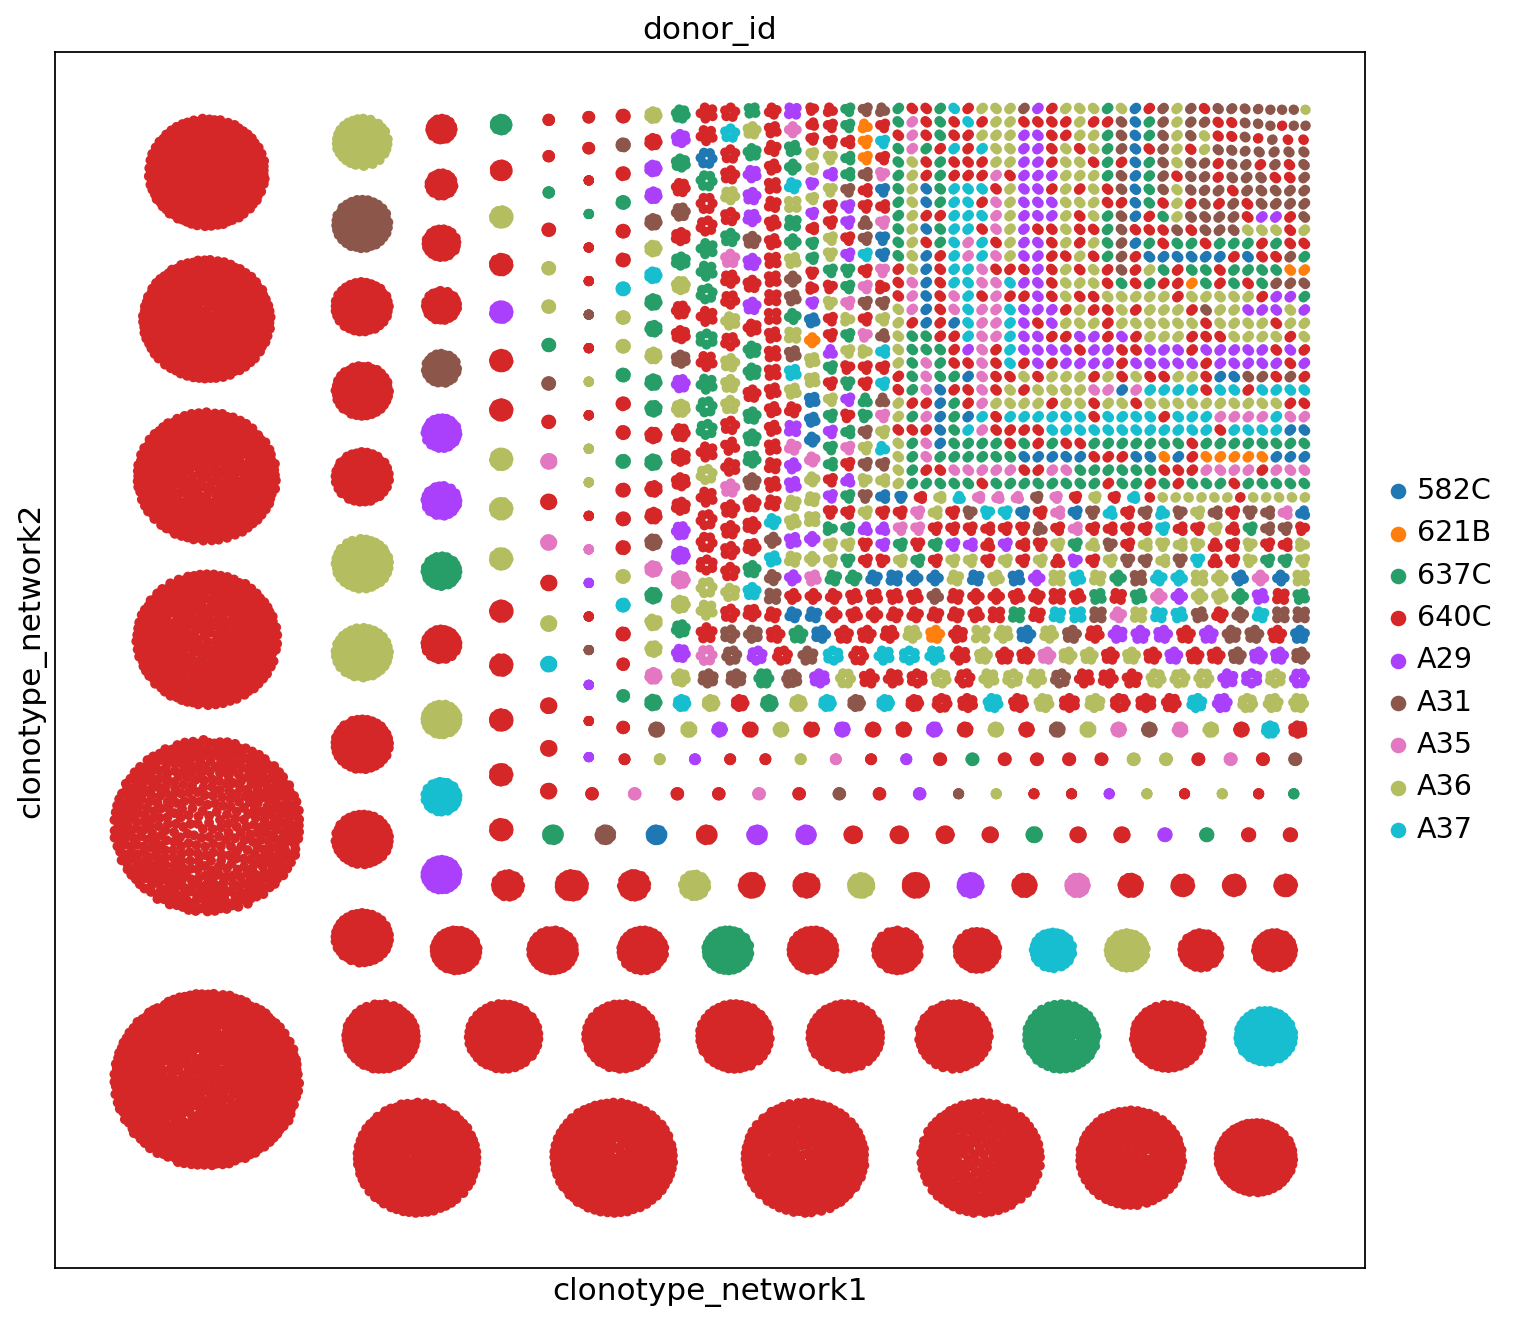

In [47]:
ir.pl.clonotype_network(adata, color="donor_id", size=80, panel_size=(10, 10))

array([<AxesSubplot:title={'center':'organ_code'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

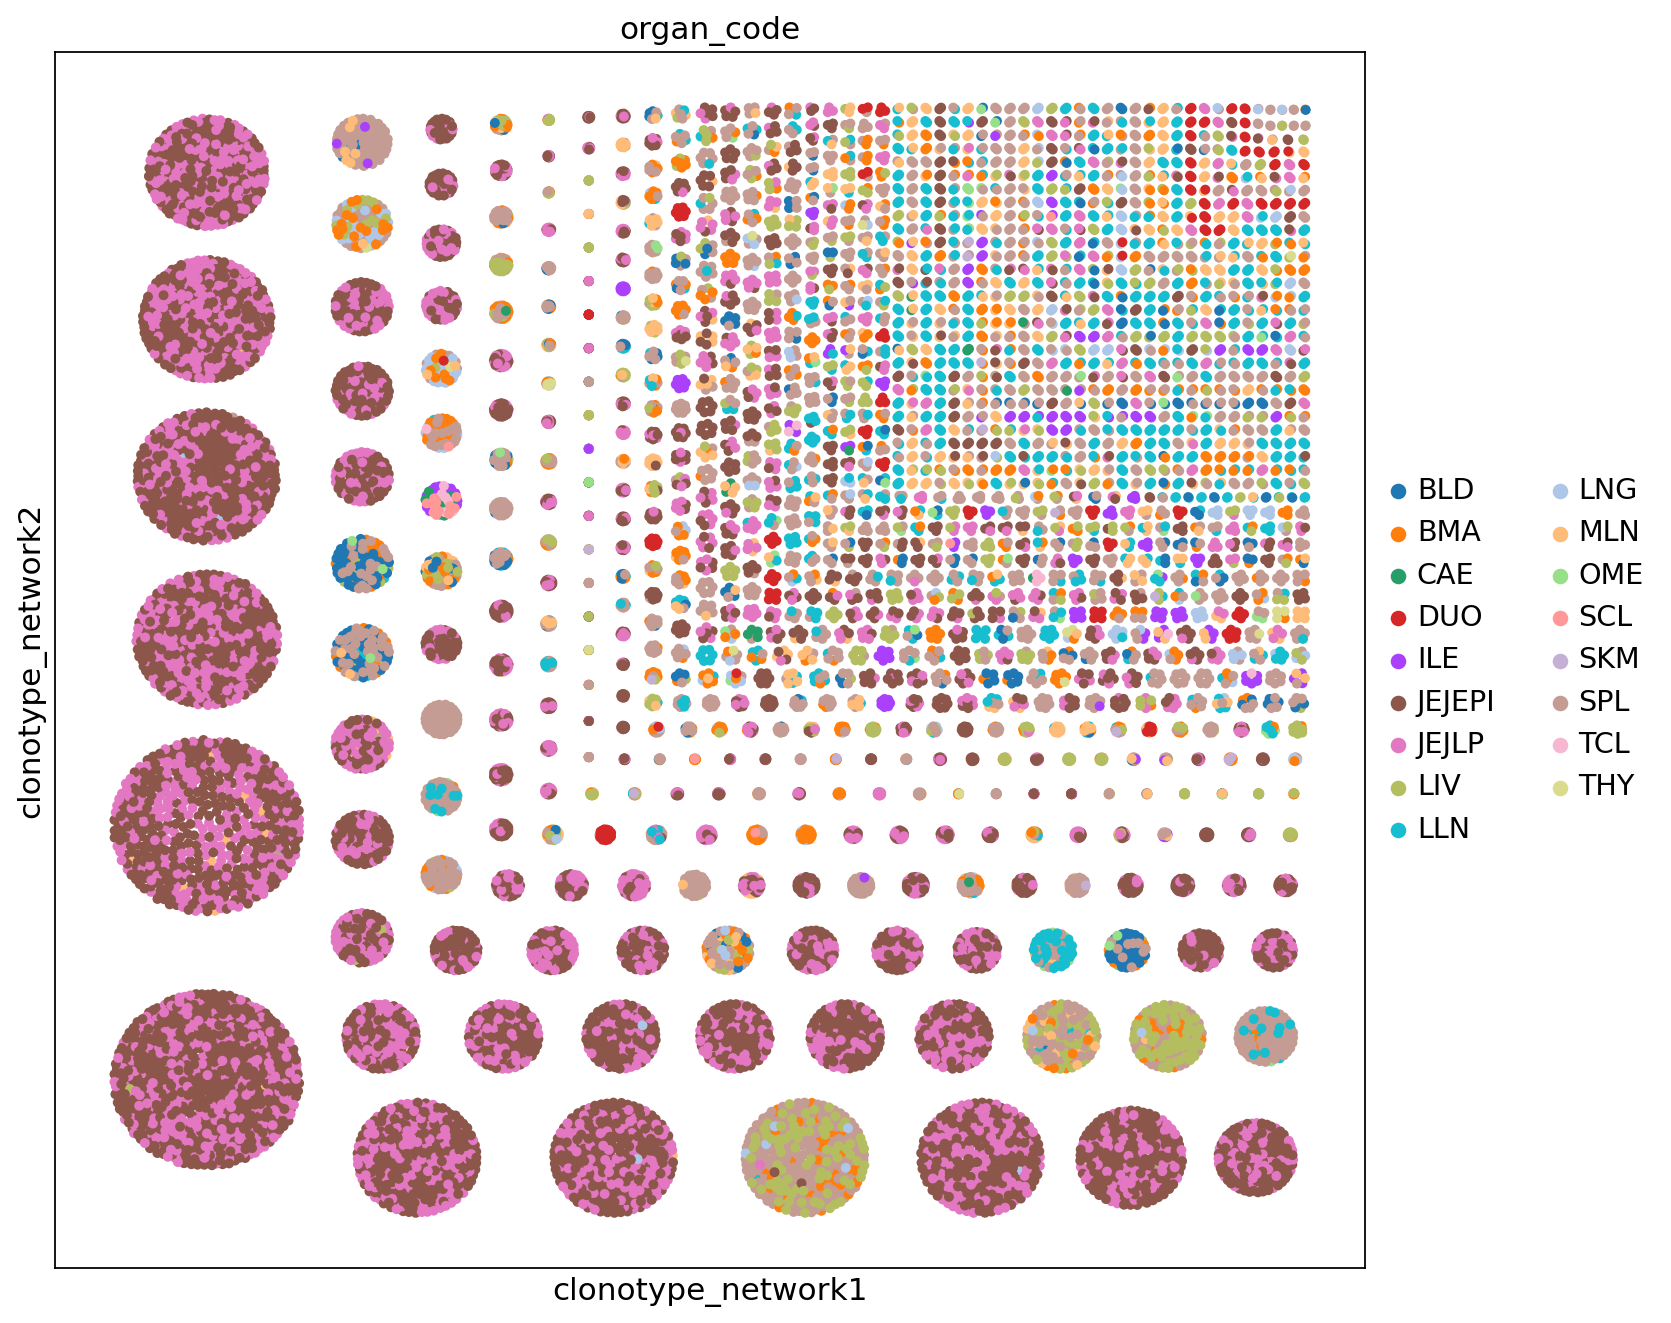

In [48]:
ir.pl.clonotype_network(adata, color="organ_code", size=80, panel_size=(10, 10))

array([<AxesSubplot:title={'center':'manual_annot_v6'}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

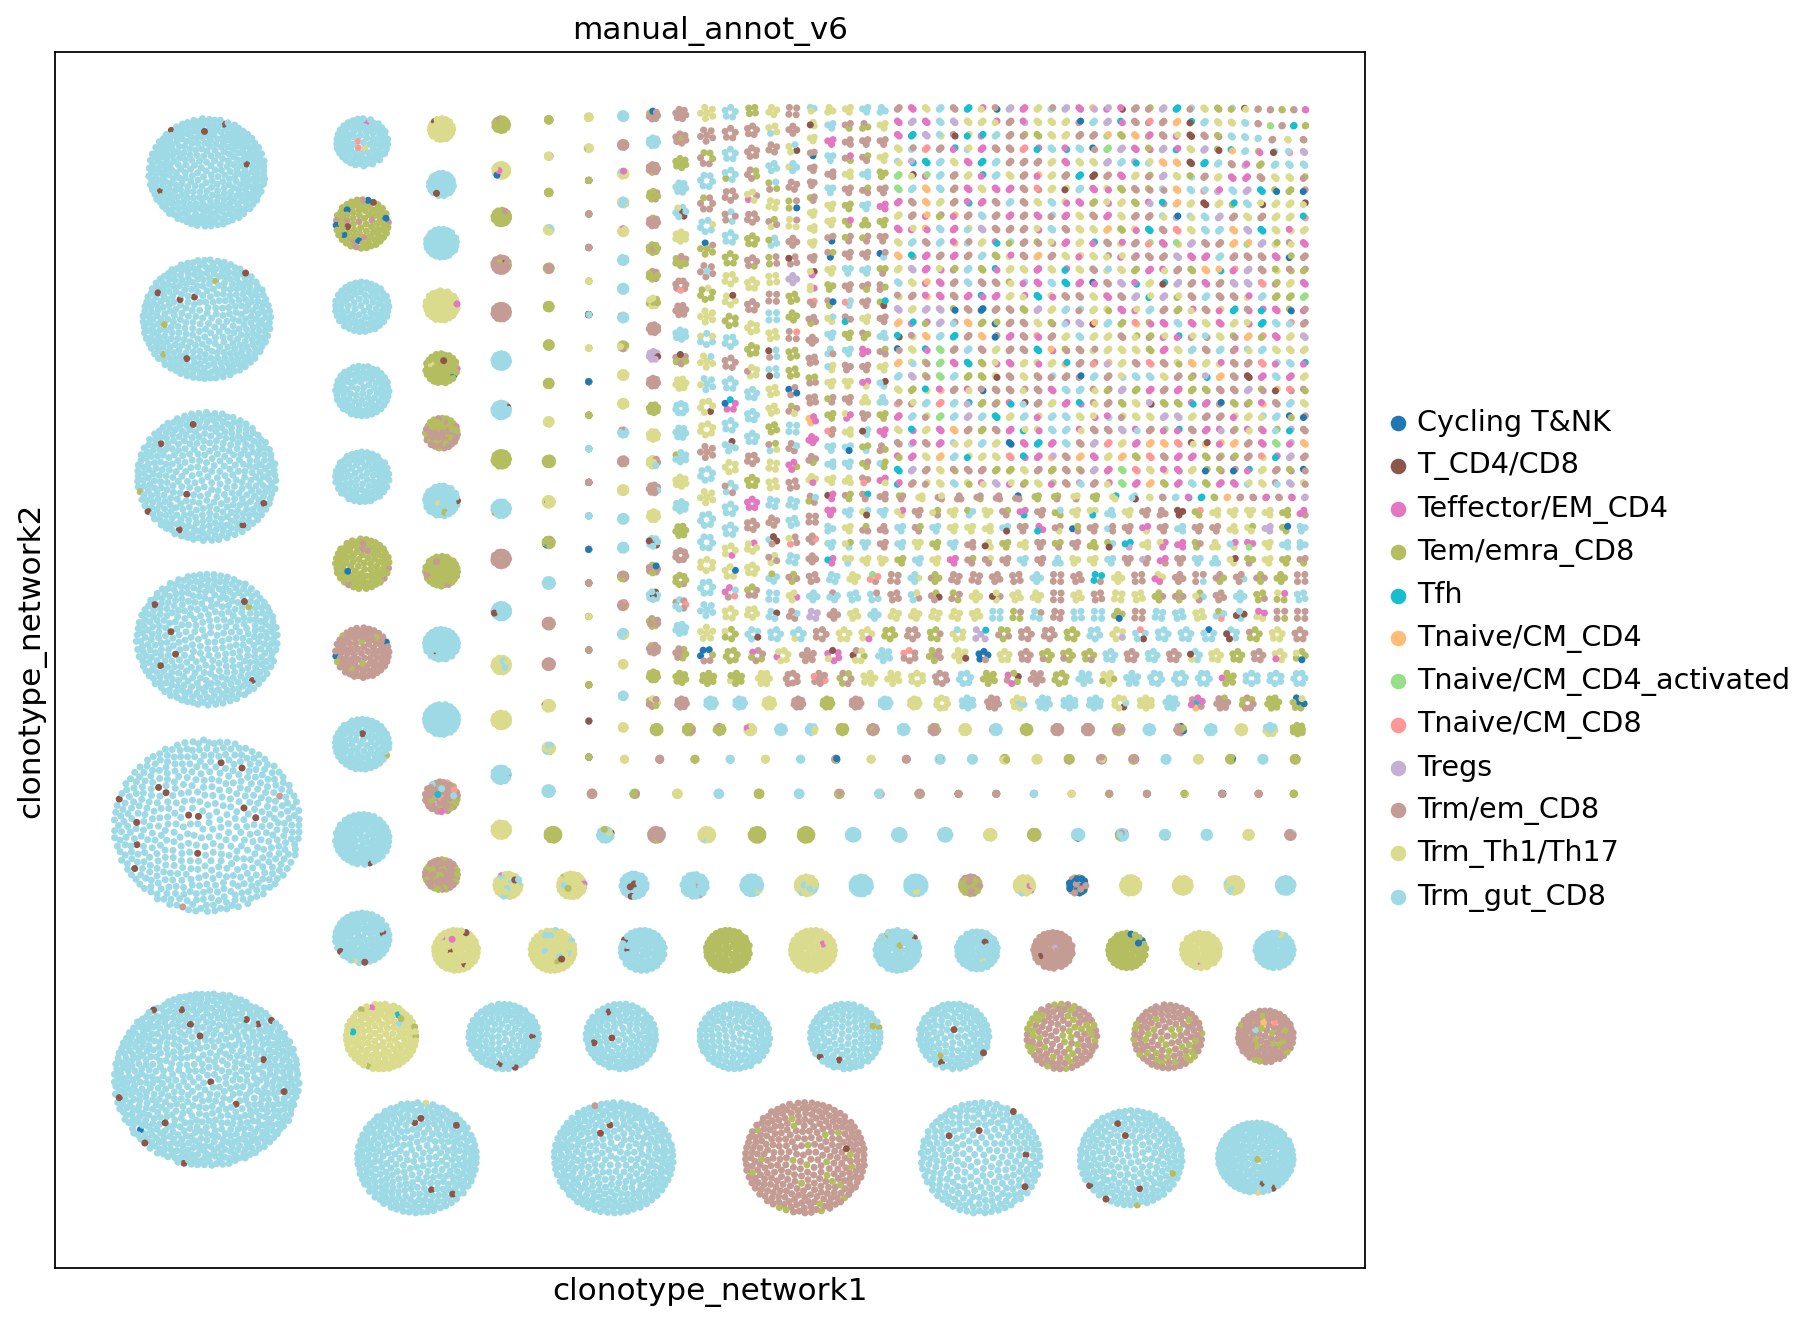

In [49]:
ir.pl.clonotype_network(adata, color="manual_annot_v6", size=40, panel_size=(10, 10))

In [50]:
ir.pl.clonotype_network(adata, color="donor_id", size=80, panel_size=(10,10), frameon=False, title=' ', save='S6E.pdf')

array([<AxesSubplot:title={'center':' '}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

In [51]:
ir.pl.clonotype_network(adata, color="organ_code", size=80, panel_size=(10,10), frameon=False, title=' ', save='S6F.pdf' )

array([<AxesSubplot:title={'center':' '}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

In [52]:
ir.pl.clonotype_network(adata, color="manual_annot_v6", size=80, panel_size=(10,10),  frameon=False, title=' ', save='S6G.pdf')

array([<AxesSubplot:title={'center':' '}, xlabel='clonotype_network1', ylabel='clonotype_network2'>],
      dtype=object)

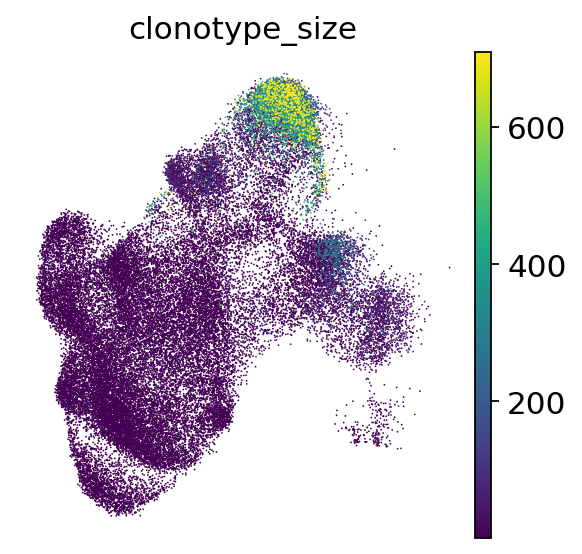

In [53]:
sc.set_figure_params(dpi_save=600)
sc.pl.umap(adata, color='clonotype_size', frameon=False, cmap='viridis', save='clonotype_size.pdf')

In [54]:
list(adata.obs['manual_annot_v6'].unique())

['Trm_Th1/Th17',
 'Trm_gut_CD8',
 'T_CD4/CD8',
 'Trm/em_CD8',
 'Tregs',
 'Tem/emra_CD8',
 'Tfh',
 'Cycling T&NK',
 'Tnaive/CM_CD4',
 'Teffector/EM_CD4',
 'Tnaive/CM_CD8',
 'Tnaive/CM_CD4_activated']

In [55]:
new_order = ['Tnaive/CM_CD4',
 'Tnaive/CM_CD4_activated','Tnaive/CM_CD8',
  'Teffector/EM_CD4',
 'Tfh','Tregs','T_CD4/CD8','Cycling T&NK',
'Trm/em_CD8',
 'Trm_Th1/Th17',
  'Tem/emra_CD8','Trm_gut_CD8']

In [56]:
adata.obs['manual_annot_v6'].cat.reorder_categories(new_order, inplace=True)

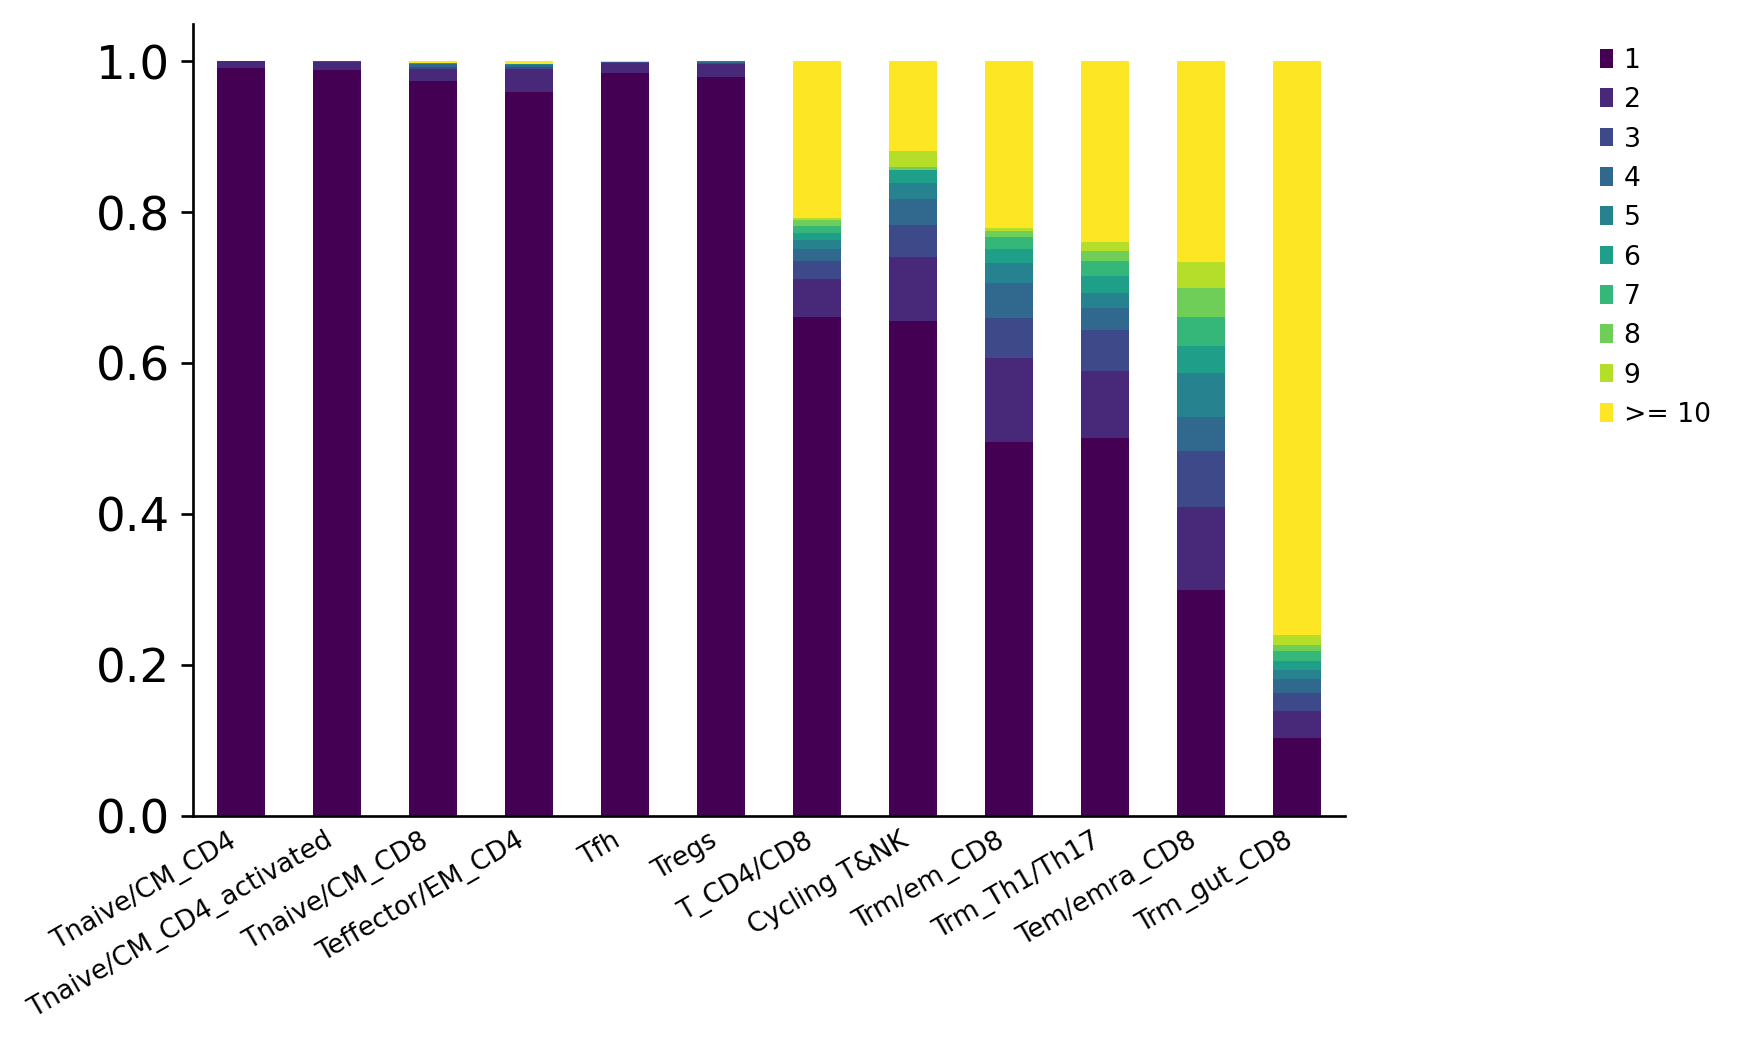

In [57]:
from matplotlib import pyplot as plt
ir.pl.clonal_expansion(adata, groupby="manual_annot_v6", clip_at=10, normalize=True, grid=False, figsize=(8,6), expanded_in='organ_code',cmap='viridis')
plt.savefig("/mnt/Science_revision/figures/4G.pdf")

In [58]:
adata.write('/mnt/Science_revision/write/TICA_TILC_TCR_selected.h5ad')

## Saving metadata for expanded clones

In [82]:
clonal = adata[adata.obs['clonotype_size']>10]

/home/ubuntu/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:216: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['connectivities'] that happens to be dimensioned at n_obs×n_obs (14652×14652).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,
/home/ubuntu/.local/lib/python3.6/site-packages/anndata/compat/__init__.py:216: FutureWarning: During AnnData slicing, found matrix at .uns['ir_neighbors_nt_identity']['distances'] that happens to be dimensioned at n_obs×n_obs (14652×14652).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
  FutureWarning,


In [83]:
clonal.obs['clonotype_size'].value_counts()

710    710
490    490
389    389
383    383
360    360
      ... 
37      37
36      36
29      29
28      28
23      23
Name: clonotype_size, Length: 75, dtype: int64

In [84]:
clonal.obs.to_csv('/mnt/Science_revision/TCR_clonotypes.csv')

#### For showing the fraction of cells with TCRab info, we select only the libraries that were sequenced for TCRab

In [85]:
adata = sc.read('/mnt/Science_revision/write/TICA_TILC_TCR.h5ad')

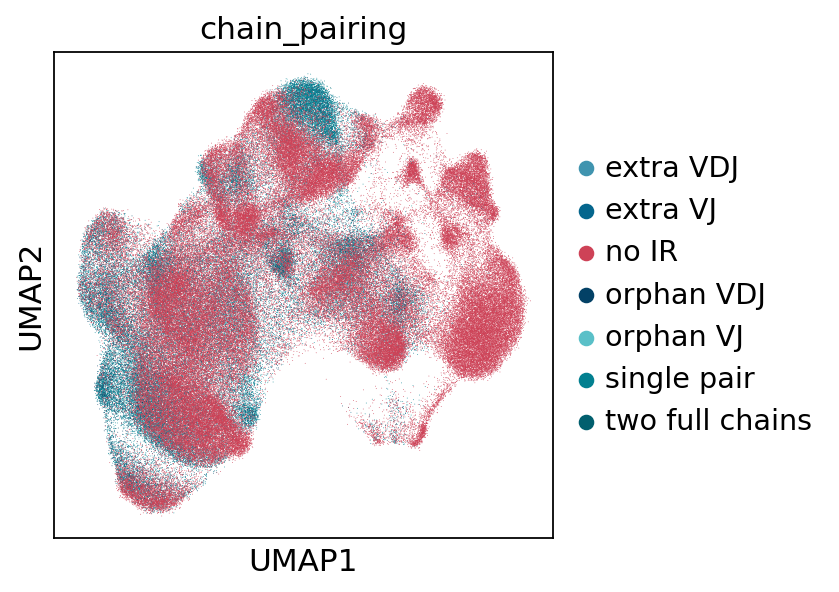

In [86]:
sc.pl.umap(adata, color='chain_pairing', palette=['#4094afff','#05668dff','#CE4257','#034166ff','#5ac0c8ff','#028090ff','#015f6eff', '#f0f3bdff'])

In [87]:
list(adata.obs['sample_T_vdj'].unique())

['Pan_T7935501',
 'nan',
 'Pan_T7935503',
 'Pan_T7935504',
 'Pan_T7935505',
 'Pan_T7935506',
 'Pan_T7935507',
 'Pan_T7935502',
 'Pan_T7918887',
 'Pan_T7918888',
 'Pan_T7918889',
 'Pan_T7918890',
 'Pan_T7918891',
 'Pan_T7918892',
 'Pan_T7918893',
 'Pan_T7918894',
 'Pan_T7918895',
 'Pan_T7918896',
 'Pan_T7918899',
 'Pan_T7980371',
 'Pan_T7980372',
 'Pan_T7980373',
 'Pan_T7980374',
 'Pan_T7980377',
 'Pan_T7980378',
 'Pan_T7980379',
 'Pan_T7980381',
 'Pan_T7980383',
 'Pan_T7991613',
 'Pan_T7991614',
 'Pan_T7991615',
 'Pan_T7991616',
 'Pan_T7991617',
 'Pan_T7991618',
 'Pan_T7991619',
 'Pan_T7991620',
 'Pan_T7991622',
 'Pan_T7991623',
 'Pan_T8010345',
 'Pan_T8010347',
 'Pan_T8010348',
 'Pan_T8010351',
 'Pan_T8010352',
 'Pan_T8010353',
 'Pan_T8010356',
 'Pan_T8010357',
 'Pan_T7935498',
 'Pan_T7935499',
 'Pan_T7935500',
 'CZI-IA10586214',
 'CZI-IA10586215',
 'CZI-IA10244332',
 'CZI-IA10244331',
 'CZI-IA10466281',
 'CZI-IA10466282',
 'CZI-IA10466283',
 'CZI-IA10466284',
 'CZI-IA10466285',
 'CZI

In [88]:
tcr = adata[adata.obs['sample_T_vdj'].isin(['Pan_T7935501',
 'Pan_T7935503',
 'Pan_T7935504',
 'Pan_T7935505',
 'Pan_T7935506',
 'Pan_T7935507',
 'Pan_T7935502',
 'Pan_T7918887',
 'Pan_T7918888',
 'Pan_T7918889',
 'Pan_T7918890',
 'Pan_T7918891',
 'Pan_T7918892',
 'Pan_T7918893',
 'Pan_T7918894',
 'Pan_T7918895',
 'Pan_T7918896',
 'Pan_T7918899',
 'Pan_T7980371',
 'Pan_T7980372',
 'Pan_T7980373',
 'Pan_T7980374',
 'Pan_T7980377',
 'Pan_T7980378',
 'Pan_T7980379',
 'Pan_T7980381',
 'Pan_T7980383',
 'Pan_T7991613',
 'Pan_T7991614',
 'Pan_T7991615',
 'Pan_T7991616',
 'Pan_T7991617',
 'Pan_T7991618',
 'Pan_T7991619',
 'Pan_T7991620',
 'Pan_T7991622',
 'Pan_T7991623',
 'Pan_T8010345',
 'Pan_T8010347',
 'Pan_T8010348',
 'Pan_T8010351',
 'Pan_T8010352',
 'Pan_T8010353',
 'Pan_T8010356',
 'Pan_T8010357',
 'Pan_T7935498',
 'Pan_T7935499',
 'Pan_T7935500',
 'CZI-IA10586214',
 'CZI-IA10586215',
 'CZI-IA10244332',
 'CZI-IA10244331',
 'CZI-IA10466281',
 'CZI-IA10466282',
 'CZI-IA10466283',
 'CZI-IA10466284',
 'CZI-IA10466285',
 'CZI-IA10466286',
 'CZI-IA10471909',
 'CZI-IA10471910',
 'CZI-IA10471911',
 'CZI-IA10471912',
 'CZI-IA10471913'])]

In [89]:
tcr_pip = list(tcr.obs['sample'].unique())

In [90]:
tcr_czi = list(tcr.obs['combined_ID'].unique())

In [91]:
tcr_czi, tcr_pip

([nan,
  'CZI-IA9924320+CZI-IA9924368',
  'CZI-IA9924321+CZI-IA9924369',
  'CZI-IA10244332+CZI-IA10244434',
  'CZI-IA10244331+CZI-IA10244433',
  'CZI-IA10466281+CZI-IA10466377',
  'CZI-IA10466282+CZI-IA10466378',
  'CZI-IA10466283+CZI-IA10466379',
  'CZI-IA10466284+CZI-IA10466380',
  'CZI-IA10466285+CZI-IA10466381',
  'CZI-IA10466286+CZI-IA10466382',
  'CZI-IA10471909+CZI-IA10472005',
  'CZI-IA10471910+CZI-IA10472006',
  'CZI-IA10471911+CZI-IA10472007',
  'CZI-IA10471912+CZI-IA10472008',
  'CZI-IA10471913+CZI-IA10472009'],
 ['Pan_T7935490',
  'Pan_T7935492',
  'Pan_T7935493',
  'Pan_T7935494',
  'Pan_T7935495',
  'Pan_T7935497',
  'Pan_T7935491',
  'Pan_T7917815',
  'Pan_T7917816',
  'Pan_T7917817',
  'Pan_T7917818',
  'Pan_T7917819',
  'Pan_T7917820',
  'Pan_T7917821',
  'Pan_T7917822',
  'Pan_T7917823',
  'Pan_T7917824',
  'Pan_T7917827',
  'Pan_T7980358',
  'Pan_T7980359',
  'Pan_T7980360',
  'Pan_T7980361',
  'Pan_T7980364',
  'Pan_T7980365',
  'Pan_T7980366',
  'Pan_T7980368',
  '

In [92]:
tcr_smp = ['CZI-IA9924320+CZI-IA9924368',
  'CZI-IA9924321+CZI-IA9924369',
  'CZI-IA10244332+CZI-IA10244434',
  'CZI-IA10244331+CZI-IA10244433',
  'CZI-IA10466281+CZI-IA10466377',
  'CZI-IA10466282+CZI-IA10466378',
  'CZI-IA10466283+CZI-IA10466379',
  'CZI-IA10466284+CZI-IA10466380',
  'CZI-IA10466285+CZI-IA10466381',
  'CZI-IA10466286+CZI-IA10466382',
  'CZI-IA10471909+CZI-IA10472005',
  'CZI-IA10471910+CZI-IA10472006',
  'CZI-IA10471911+CZI-IA10472007',
  'CZI-IA10471912+CZI-IA10472008',
  'CZI-IA10471913+CZI-IA10472009','Pan_T7935490',
  'Pan_T7935492',
  'Pan_T7935493',
  'Pan_T7935494',
  'Pan_T7935495',
  'Pan_T7935497',
  'Pan_T7935491',
  'Pan_T7917815',
  'Pan_T7917816',
  'Pan_T7917817',
  'Pan_T7917818',
  'Pan_T7917819',
  'Pan_T7917820',
  'Pan_T7917821',
  'Pan_T7917822',
  'Pan_T7917823',
  'Pan_T7917824',
  'Pan_T7917827',
  'Pan_T7980358',
  'Pan_T7980359',
  'Pan_T7980360',
  'Pan_T7980361',
  'Pan_T7980364',
  'Pan_T7980365',
  'Pan_T7980366',
  'Pan_T7980368',
  'Pan_T7980370',
  'Pan_T7991584',
  'Pan_T7991585',
  'Pan_T7991586',
  'Pan_T7991587',
  'Pan_T7991588',
  'Pan_T7991589',
  'Pan_T7991590',
  'Pan_T7991591',
  'Pan_T7991593',
  'Pan_T7991594',
  'Pan_T8010318',
  'Pan_T8010320',
  'Pan_T8010321',
  'Pan_T8010325',
  'Pan_T8010326',
  'Pan_T8010327',
  'Pan_T8010330',
  'Pan_T8010331',
  'Pan_T7935487',
  'Pan_T7935488',
  'Pan_T7935489']

In [93]:
tcr_czi_data = adata[adata.obs['combined_ID'].isin(tcr_smp)]

In [94]:
tcr_pip_data = adata[adata.obs['sample'].isin(tcr_smp)]

In [95]:
holder = [tcr_czi_data, tcr_pip_data]

In [96]:
adata = holder[0].concatenate(holder[1:], join='outer', index_unique=None)

In [97]:
list(adata.obs['chain_pairing'].unique())

['single pair',
 'no IR',
 'orphan VDJ',
 'orphan VJ',
 'extra VDJ',
 'extra VJ',
 'two full chains']

In [98]:
chain_order = ['single pair',
 'orphan VDJ',
 'orphan VJ',
 'extra VDJ',
 'extra VJ',
 'two full chains',
 'no IR']

In [99]:
adata.obs['chain_pairing'].cat.reorder_categories(chain_order, inplace=True)

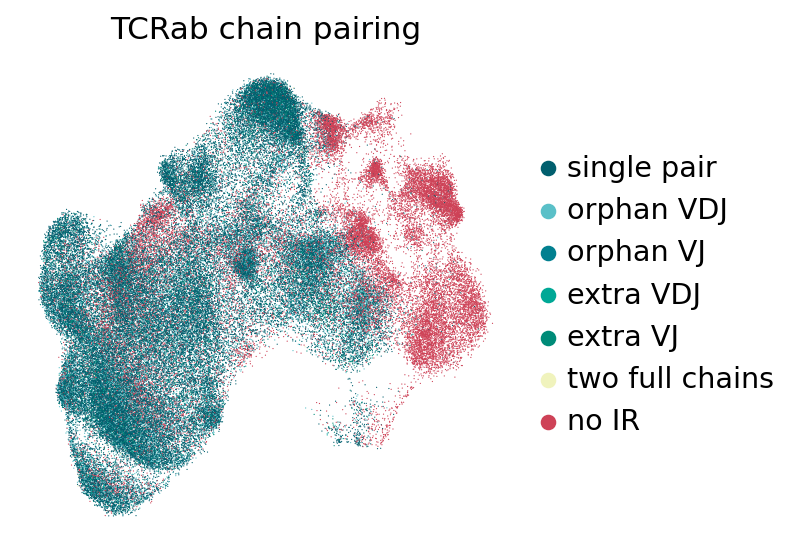

In [101]:
sc.set_figure_params(dpi_save=600)
sc.pl.umap(adata, color='chain_pairing', palette=['#015F6E','#5AC0C8','#028090','#00A896','#008B78','#F0F3BD','#CE4257'], title='TCRab chain pairing', frameon=False, save='23A.pdf')

In [102]:
ct_order = ['Tnaive/CM_CD4',
 'Tnaive/CM_CD4_activated','Trm_Th1/Th17',

 'Teffector/EM_CD4',
 'Tfh','Tregs','MAIT', 'T_CD4/CD8','Tnaive/CM_CD8',  'Tem/emra_CD8','Trm/em_CD8',
            'Trm_gut_CD8',
            'Tgd_CRTAM+',
 'Trm_Tgd',
 'Cycling T&NK',
 'NK_CD16+','NK_CD56bright_CD16-',
 
 
 'ILC3']

In [103]:
adata.obs['manual_annot_v6'].cat.reorder_categories(ct_order, inplace=True)

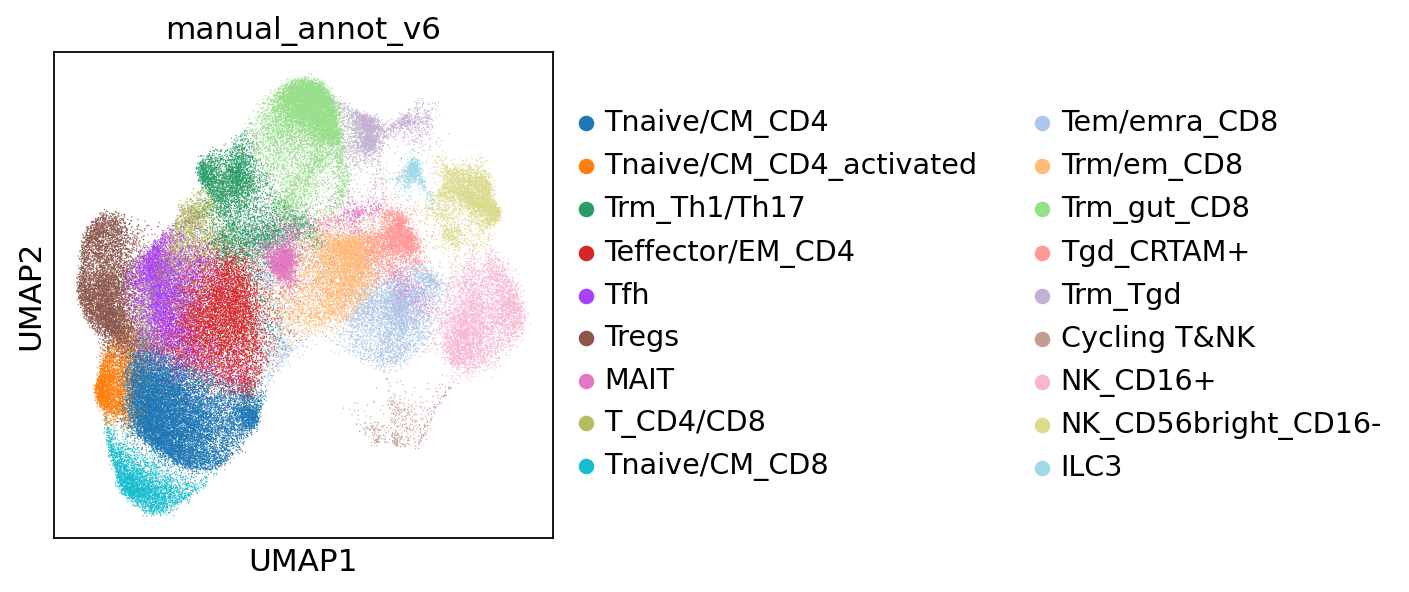

In [104]:
sc.pl.umap(adata, color='manual_annot_v6')

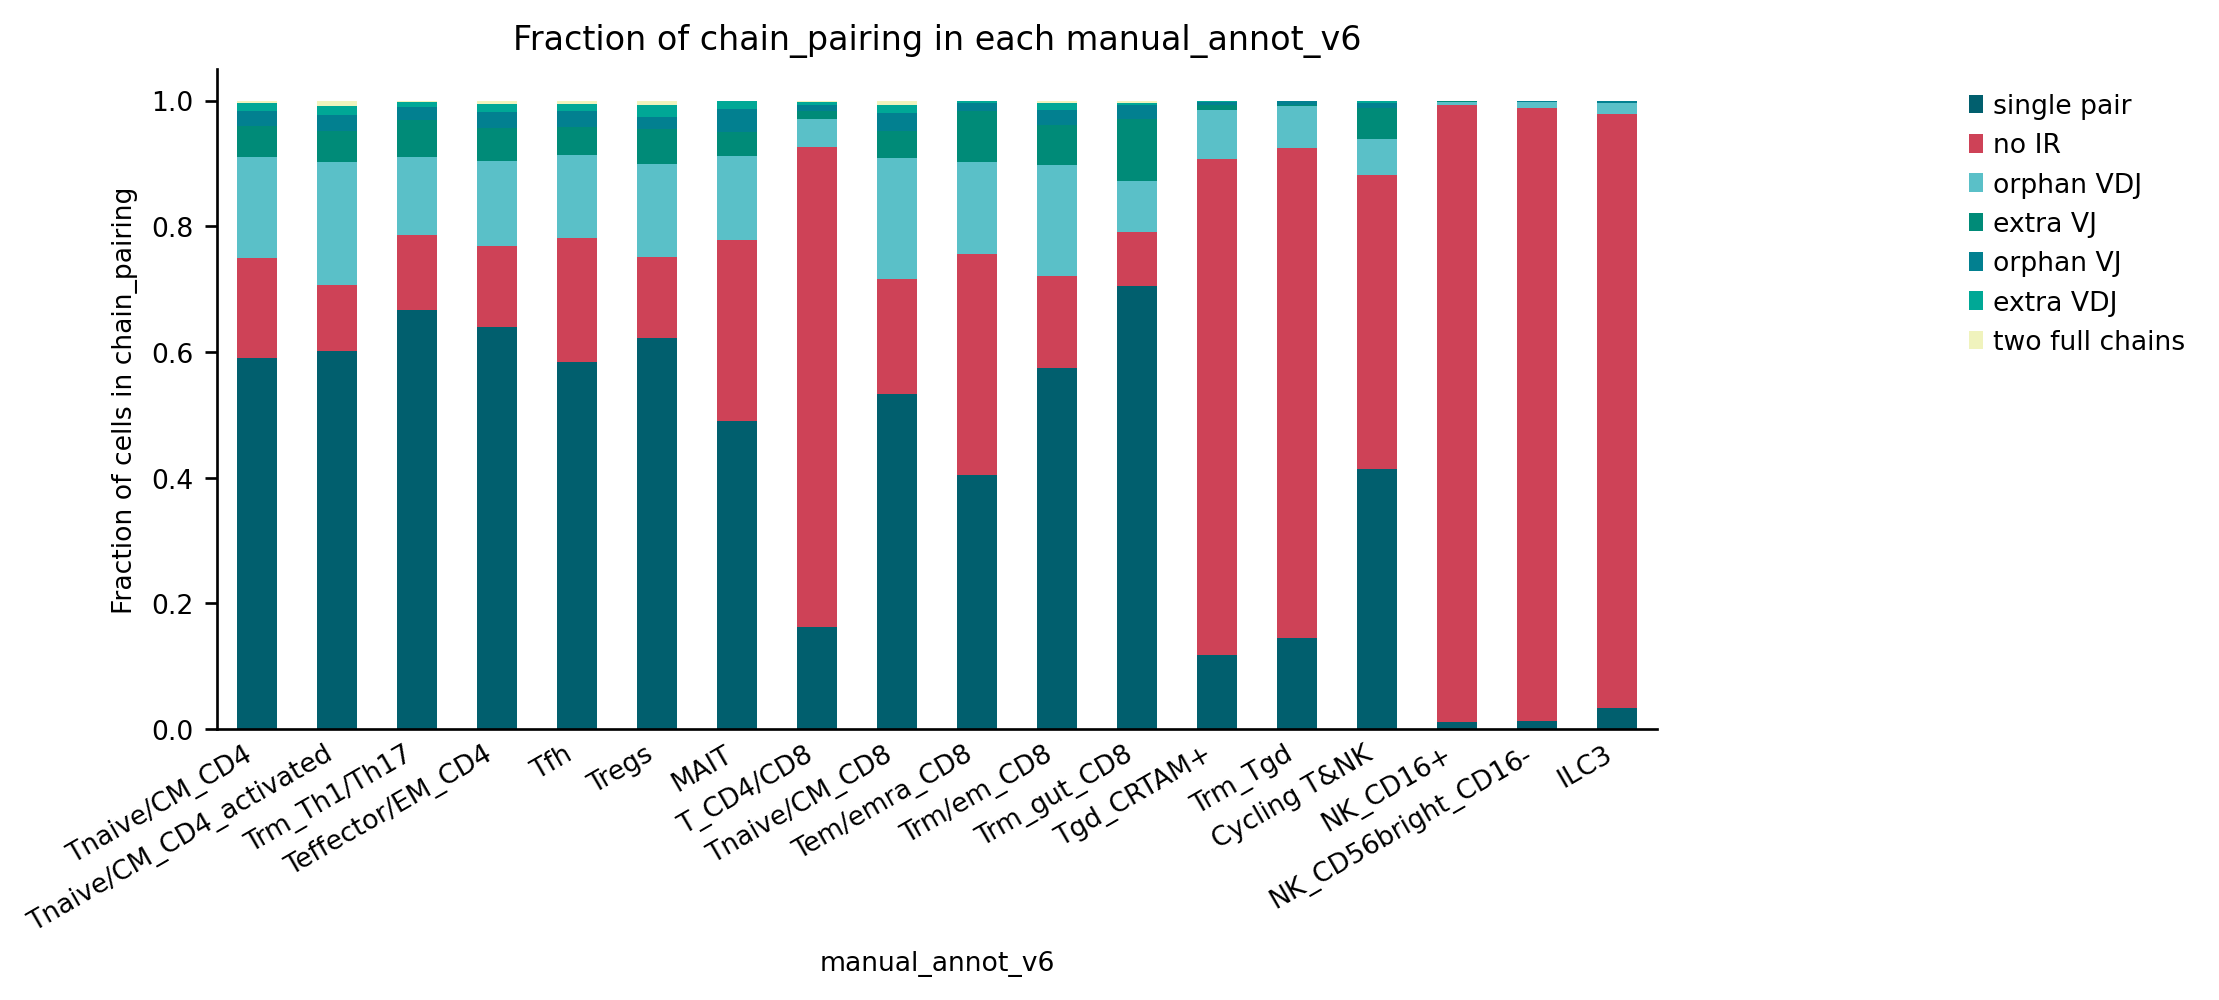

In [105]:
from matplotlib import pyplot as plt
ir.pl.group_abundance(adata, groupby="manual_annot_v6", target_col="chain_pairing", figsize=[10,5], fontsize=8, normalize=True, grid=False, sort=ct_order)
plt.savefig("/mnt/Science_revision/figures/21A.pdf")

In [106]:
adata.write('/mnt/Science_revision/write/TICA_TILC_TCR_onlyseq.h5ad')

### TCR_GD samples

In [107]:
adata = sc.read ('/mnt/Science_revision/write/TICA_TILC.h5ad')

In [137]:
meta_GEX_VDJ = pd.read_csv('/mnt/Science_revision/meta_GEX_TCR_GD.csv', index_col='TCR_GD')

In [138]:
meta_GEX_VDJ.columns

Index(['CBTM_ID', 'ID', 'Identity', 'Sanger Sample ID'], dtype='object')

In [139]:
meta_GEX_VDJ.head(2)

CBTM_ID   ID   Identity Sanger Sample ID
TCR_GD                                               
Pan_T9475744    390C  A29  A29-BMA-1     Pan_T7935495
Pan_T9475745    390C  A29  A29-LIV-1     Pan_T7935497

In [140]:
meta_GEX_VDJ.shape

(14, 4)

In [141]:
holder = []

for sample_vdj in samples:
    
    holder.append(ir.io.read_airr('/mnt/Science_revision/rawdata/TCRgd/'+sample_vdj+'/hiconf_contig_igblast_db-pass.tsv'))
 
    sample_gex = meta_GEX_VDJ.loc[sample_vdj, 'Sanger Sample ID']
    holder[-1].obs_names = [sample_gex+'_'+i.split('-')[0] for i in holder[-1].obs_names]
        

... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_1_cdr3' as cat

In [142]:
adata_tcr = pd.concat([i.obs for i in holder])

In [143]:
adata_tcr.head(1)

multi_chain IR_VJ_1_locus IR_VJ_2_locus  \
Pan_T7935495_AAACCTGTCCTGCTTG        False           TRA           NaN   

                              IR_VDJ_1_locus IR_VDJ_2_locus     IR_VJ_1_cdr3  \
Pan_T7935495_AAACCTGTCCTGCTTG            TRB            NaN  CAASKKSGGSYIPTF   

                              IR_VJ_2_cdr3    IR_VDJ_1_cdr3 IR_VDJ_2_cdr3  \
Pan_T7935495_AAACCTGTCCTGCTTG          NaN  CASSSEPGTGGGYTF           NaN   

                                                             IR_VJ_1_cdr3_nt  \
Pan_T7935495_AAACCTGTCCTGCTTG  TGTGCAGCAAGCAAGAAATCAGGAGGAAGCTACATACCTACATTT   

                               ... IR_VDJ_2_j_gene IR_VJ_1_c_gene  \
Pan_T7935495_AAACCTGTCCTGCTTG  ...             NaN           TRAC   

                              IR_VJ_2_c_gene  IR_VDJ_1_c_gene  \
Pan_T7935495_AAACCTGTCCTGCTTG            NaN            TRBC1   

                               IR_VDJ_2_c_gene  IR_VJ_1_junction_ins  \
Pan_T7935495_AAACCTGTCCTGCTTG              NaN                  None   

                               IR_VJ_2_junction_ins  IR_VDJ_1_junction_ins  \
Pan_T7935495_AAACCTGTCCTGCTTG                  None                   None   

                               IR_VDJ_2_junction_ins  has_ir  
Pan_T7935495_AAACCTGTCCTGCTTG                   None    True  

[1 rows x 42 columns]

In [144]:
adata_tcr.columns

Index(['multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus',
       'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3',
       'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt',
       'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr',
       'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw',
       'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw',
       'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene',
       'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene',
       'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene',
       'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene',
       'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene',
       'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins',
       'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir'],
      dtype='object')

In [145]:
for col in adata_tcr.columns:
    adata.obs[col] = adata_tcr[col]

In [146]:
ir.tl.chain_pairing(adata)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: chain_pairing is a deprecated function and will be removed in a future version of scirpy. Use `tl.chain_qc` instead.
  """Entry point for launching an IPython kernel.


... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as categorical
... storing 'IR_VDJ_1_v_gene' as categorical
... storing 'IR_VDJ_2_v_gene' as categorical
... storing 'IR_VJ_1_d_gene' as categorical
... storing 'IR_VJ_2_d_gene' as categorical
... storing 'IR_VDJ_1_d_gene' as categorical
... storing 'IR_VDJ_2_d_gene' as categorical
... storing 'IR_VJ_1_j_gene' as categorical
... storing 'IR_VJ_2_j_gene' as categorical
... storing 'IR_VDJ_1_j_gene' 

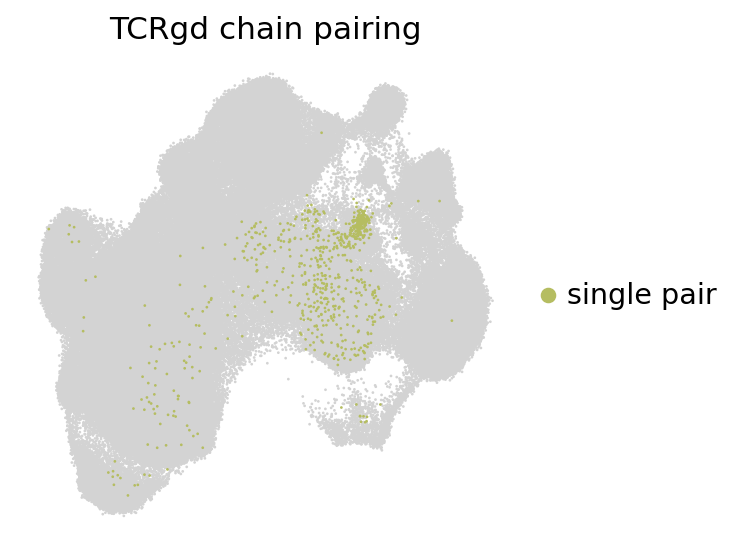

In [147]:
sc.pl.umap(adata, color='chain_pairing', groups=['single pair'], title='TCRgd chain pairing',size=6, frameon=False)

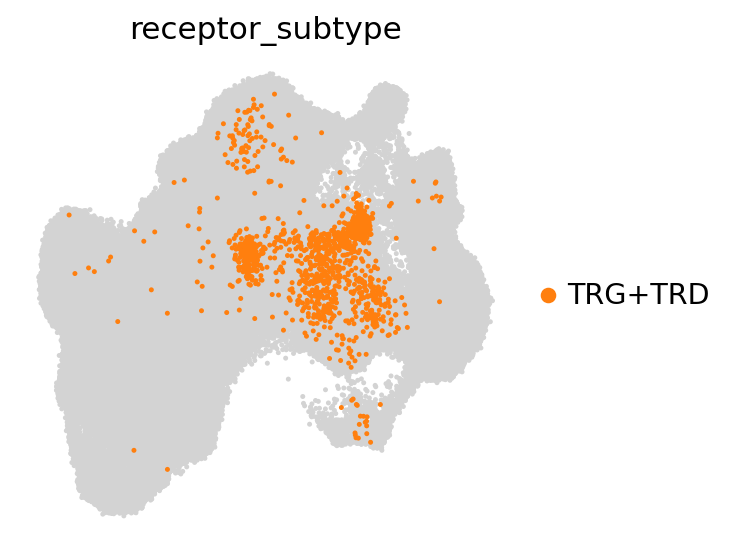

In [148]:
sc.pl.umap(adata, color='receptor_subtype', size=20, frameon=False, groups=['TRG+TRD'])

In [150]:
prob_cols = ['multi_chain',
 'IR_VJ_1_locus',
 'IR_VJ_2_locus',
 'IR_VDJ_1_locus',
 'IR_VDJ_2_locus',
 'IR_VJ_1_cdr3',
 'IR_VJ_2_cdr3',
 'IR_VDJ_1_cdr3',
 'IR_VDJ_2_cdr3',
 'IR_VJ_1_cdr3_nt',
 'IR_VJ_2_cdr3_nt',
 'IR_VDJ_1_cdr3_nt',
 'IR_VDJ_2_cdr3_nt',
 'IR_VJ_1_expr',
 'IR_VJ_2_expr',
 'IR_VDJ_1_expr',
 'IR_VDJ_2_expr',
 'IR_VJ_1_expr_raw',
 'IR_VJ_2_expr_raw',
 'IR_VDJ_1_expr_raw',
 'IR_VDJ_2_expr_raw',
 'IR_VJ_1_v_gene',
 'IR_VJ_2_v_gene',
 'IR_VDJ_1_v_gene',
 'IR_VDJ_2_v_gene',
 'IR_VJ_1_d_gene',
 'IR_VJ_2_d_gene',
 'IR_VDJ_1_d_gene',
 'IR_VDJ_2_d_gene',
 'IR_VJ_1_j_gene',
 'IR_VJ_2_j_gene',
 'IR_VDJ_1_j_gene',
 'IR_VDJ_2_j_gene',
 'IR_VJ_1_c_gene',
 'IR_VJ_2_c_gene',
 'IR_VDJ_1_c_gene',
 'IR_VDJ_2_c_gene',
 'IR_VJ_1_junction_ins',
 'IR_VJ_2_junction_ins',
 'IR_VDJ_1_junction_ins',
 'IR_VDJ_2_junction_ins',
 'has_ir',
 'receptor_type',
 'receptor_subtype',
 'chain_pairing']

In [151]:
for col in prob_cols:
    adata.obs[col] = [str(i) for i in adata.obs[col]]

In [152]:
adata.write('/mnt/Science_revision/write/TICA_TILC_TCRgd.h5ad')

... storing 'multi_chain' as categorical
... storing 'IR_VJ_1_locus' as categorical
... storing 'IR_VJ_2_locus' as categorical
... storing 'IR_VDJ_1_locus' as categorical
... storing 'IR_VDJ_2_locus' as categorical
... storing 'IR_VJ_1_cdr3' as categorical
... storing 'IR_VJ_2_cdr3' as categorical
... storing 'IR_VDJ_1_cdr3' as categorical
... storing 'IR_VDJ_2_cdr3' as categorical
... storing 'IR_VJ_1_cdr3_nt' as categorical
... storing 'IR_VJ_2_cdr3_nt' as categorical
... storing 'IR_VDJ_1_cdr3_nt' as categorical
... storing 'IR_VDJ_2_cdr3_nt' as categorical
... storing 'IR_VJ_1_expr' as categorical
... storing 'IR_VJ_2_expr' as categorical
... storing 'IR_VDJ_1_expr' as categorical
... storing 'IR_VDJ_2_expr' as categorical
... storing 'IR_VJ_1_expr_raw' as categorical
... storing 'IR_VJ_2_expr_raw' as categorical
... storing 'IR_VDJ_1_expr_raw' as categorical
... storing 'IR_VDJ_2_expr_raw' as categorical
... storing 'IR_VJ_1_v_gene' as categorical
... storing 'IR_VJ_2_v_gene' as c

In [153]:
adata = adata[adata.obs['sample'].isin(list(meta_GEX_VDJ['Sanger Sample ID']))]

In [154]:
chain_order = ['single pair',
 'orphan VDJ',
 'orphan VJ',
 'extra VDJ',
 'extra VJ',
 'two full chains','multichain','ambiguous',
 'no IR']

In [155]:
adata.obs['chain_pairing'].cat.reorder_categories(chain_order, inplace=True)

In [156]:
ct_order = ['Tnaive/CM_CD4',
 'Tnaive/CM_CD4_activated','Trm_Th1/Th17',

 'Teffector/EM_CD4',
 'Tfh','Tregs','MAIT', 'T_CD4/CD8','Tnaive/CM_CD8',  'Tem/emra_CD8','Trm/em_CD8',
            'Trm_gut_CD8',
            'Tgd_CRTAM+',
 'Trm_Tgd',
 'Cycling T&NK',
 'NK_CD16+','NK_CD56bright_CD16-',
 
 
 'ILC3']

In [157]:
adata.obs['manual_annot_v6'].cat.reorder_categories(ct_order, inplace=True)

In [158]:
adata.obs['chain_pairing'].cat.reorder_categories(chain_order, inplace=True)

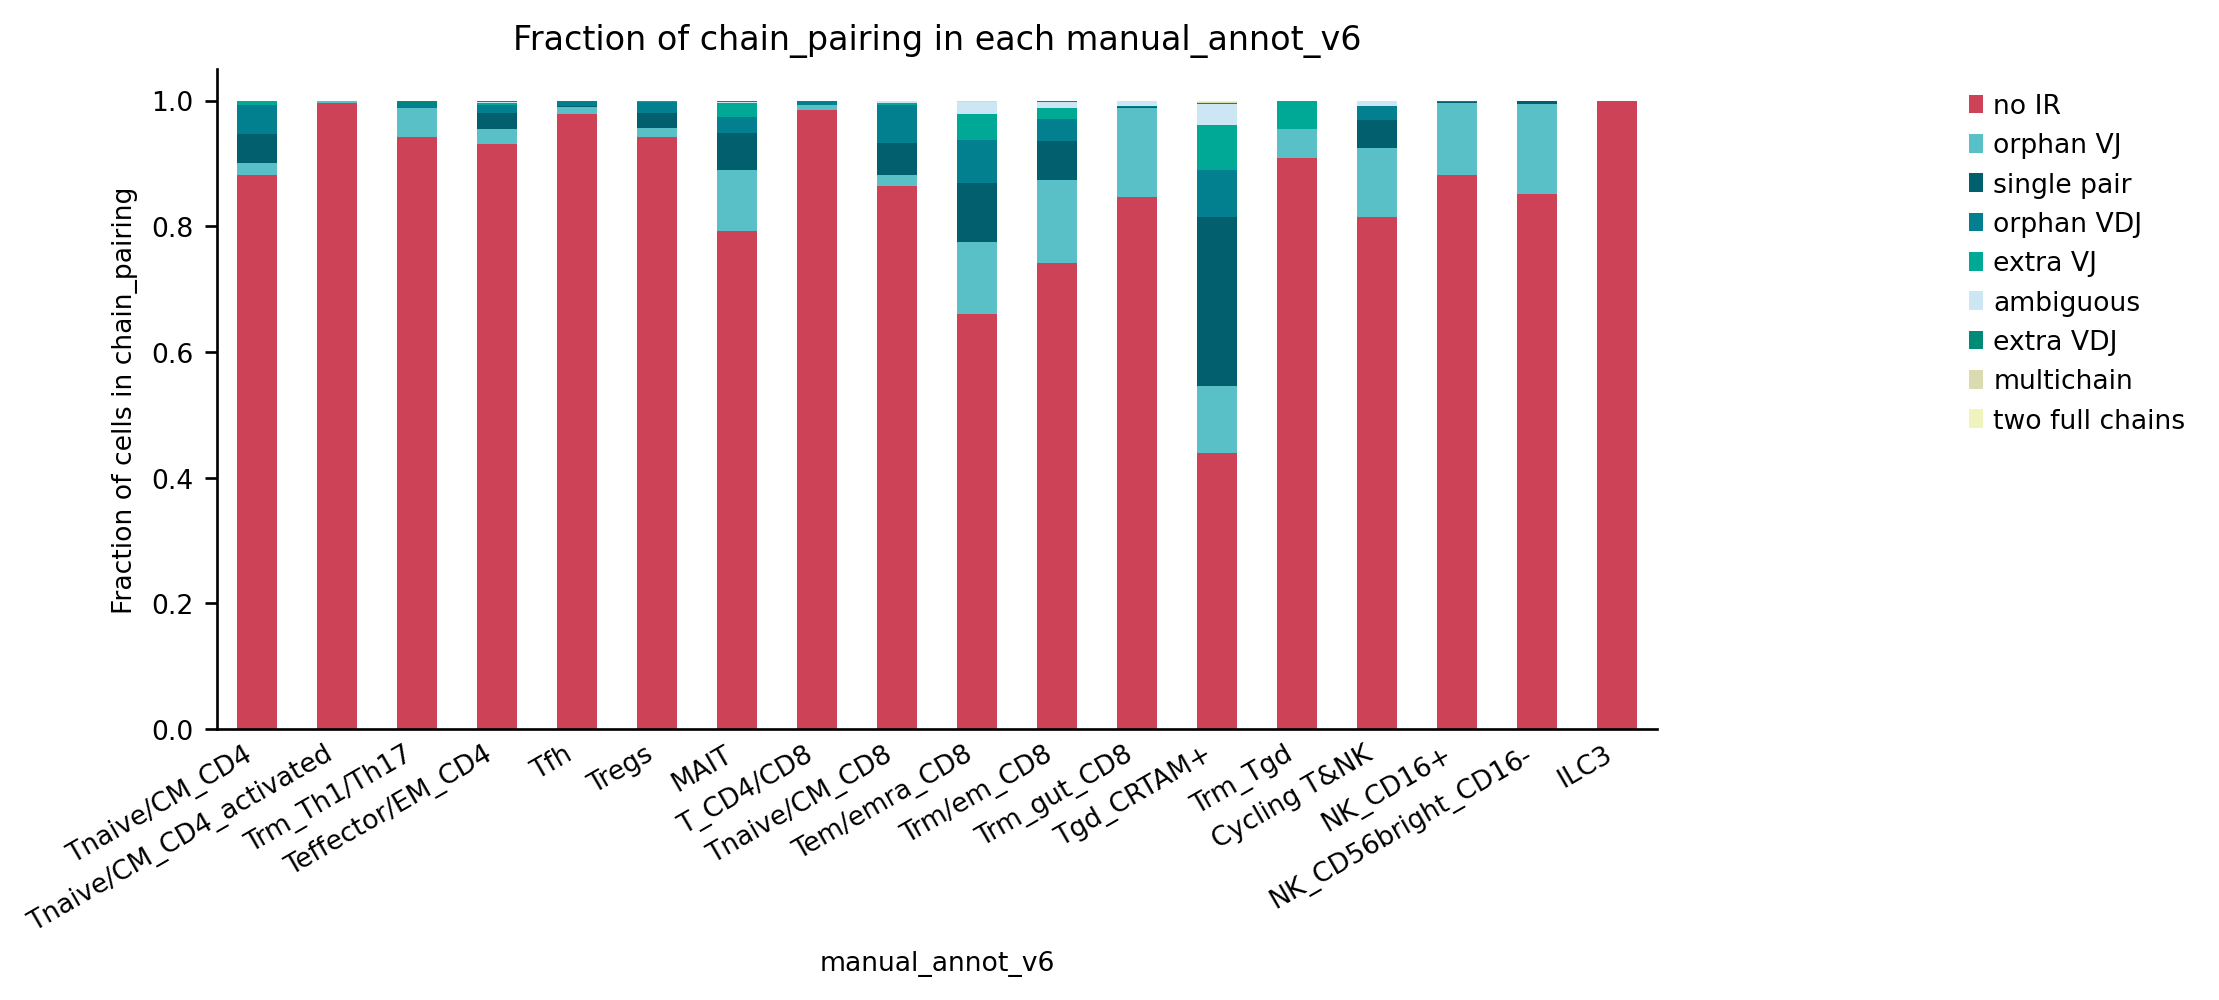

In [159]:
from matplotlib import pyplot as plt
ir.pl.group_abundance(adata, groupby="manual_annot_v6", target_col="chain_pairing",  figsize=[10,5], fontsize=8, normalize=True, grid=False, sort=ct_order, color=['#CE4257','#5AC0C8','#015F6E','#028090','#00A896','#CCE6F4','#008B78','#DADCB0','#F0F3BD'])
plt.savefig("/mnt/Science_revision/figures/23B.pdf")